# Human Protein Atlas Image Classification

## External Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.colors as col
import matplotlib.pyplot as plt
from importlib import reload
from skimage.exposure import equalize_adapthist
from IPython.core.display import display, HTML
import seaborn as sns
from PIL import Image
%matplotlib inline

## Local Imports

In [10]:
import protein_atlas as pa

In [18]:
from PIL import Image
reload(pa)
atlas = pa.ProteinAtlas()
id_ = atlas.labels.index[0]

bands = [None] * atlas.n_channels
for chan_ix in range(atlas.n_channels):
    chan_path = atlas.get_path(id_,chan_ix)
    bands[chan_ix] = Image.open(chan_path)

In [26]:
bands[0].mode

'L'

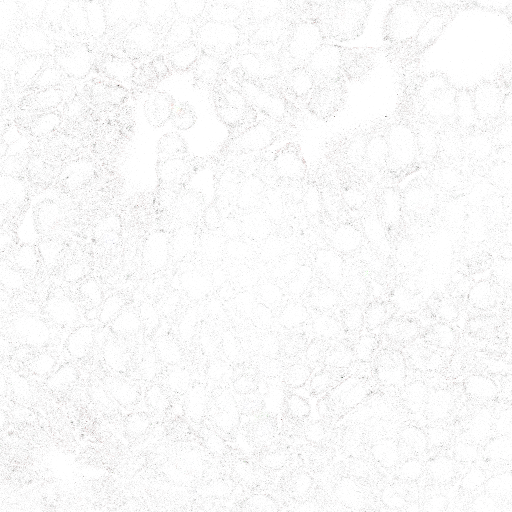

In [29]:
img = Image.merge(mode = "RGBA", bands = bands)
img

## Output Formatting

In [3]:
# Notebook Settings
display(HTML("<style>.container { width:100% !important; }</style>"))

# Numpy Settings
np.set_printoptions(precision = 3, linewidth = 1e5, threshold = 1e5)

# Pandas Settings
pd.set_option("display.max_colwidth", 500)
pd.set_option("display.max_columns",30)
pd.set_option("display.float_format","{:.2f}".format)

## Label Counts

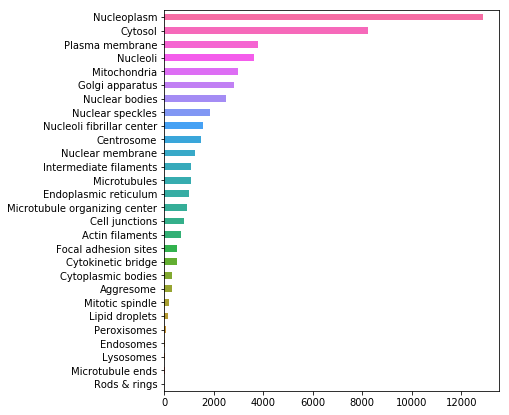

In [118]:
fig, ax = plt.subplots(figsize=(6,7))
counts = atlas.labels.sum()
counts.index = atlas.classes
counts = counts.sort_values()
colors = sns.color_palette("husl",atlas.n_classes)
counts.plot.barh(ax = ax, fontsize = 10, color = colors)


## Input Pipeline

In [86]:
reload(pa)
atlas = pa.ProteinAtlas()
datagen = pa.ProteinAtlasGenerator()
X, y = datagen[0]
for i in range(10):
    plt.figure()
    plt.imshow(X[i,:,:,0:3])

(array([[[[0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.004, 0.   ],
          ...,
          [0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ]],
 
         [[0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ],
          ...,
          [0.   , 0.   , 0.   , 0.   ],
          [0.004, 0.   , 0.004, 0.   ],
          [0.   , 0.   , 0.   , 0.   ]],
 
         [[0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ],
          ...,
          [0.   , 0.   , 0.   , 0.035],
          [0.   , 0.012, 0.   , 0.   ],
          [0.   , 0.   , 0.   , 0.   ]],
 
         ...,
 
         [[0.   , 0.   , 0.   , 0.   ],
          [0.008, 0.   , 0.   , 0.   ],
          [0.012, 0.   , 0.   , 0.016],
          ...,
          [0.024, 0.02 , 0.   , 0.082],
          [0.035, 0.004, 0.   , 0.0

## Correlation Between Labels

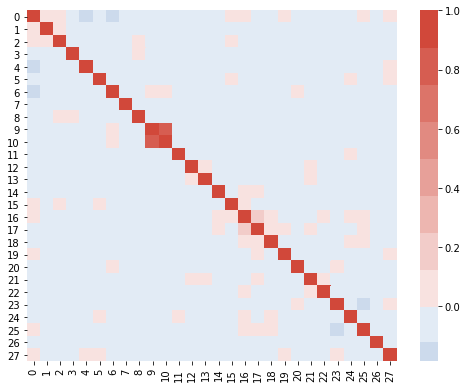

In [40]:
reload(pa)
atlas = pa.ProteinAtlas()
fig, ax = plt.subplots(figsize = (7,5.5))
cor = atlas.labels.corr()
cor.columns = np.arange(len(atlas.classes))
cor.index = np.arange(len(atlas.classes))
cmap = sns.diverging_palette(250,15,sep=1,n=16)
sns.heatmap(cor, ax = ax, cmap = cmap, center = 0)
plt.tight_layout()
plt.savefig("corr.pdf")

## Color Palettes

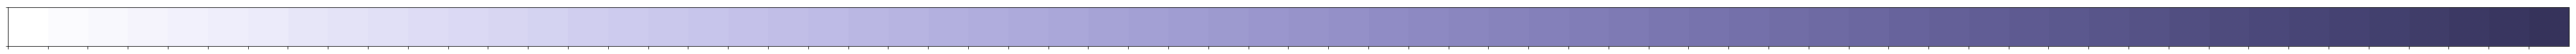

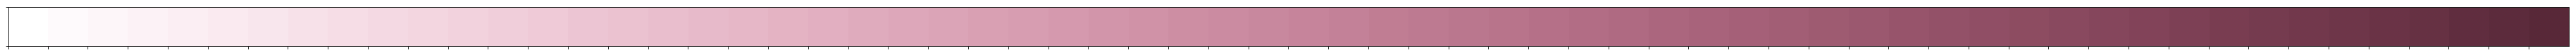

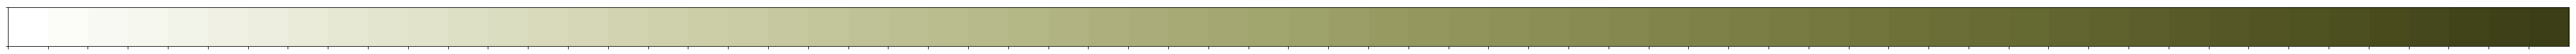

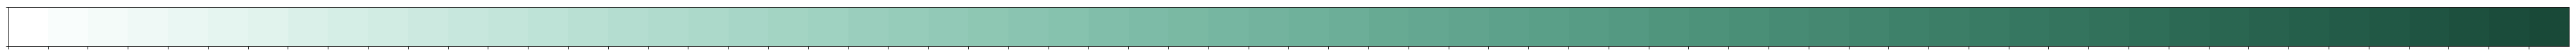

## Visualizing Example Images

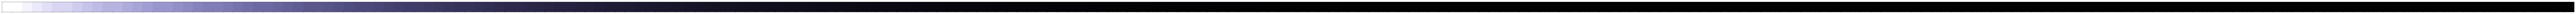

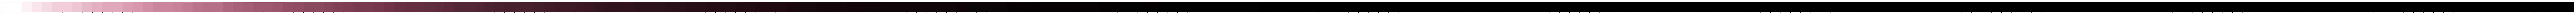

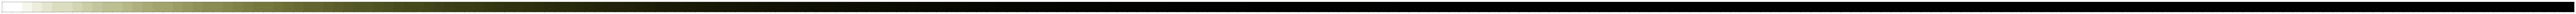

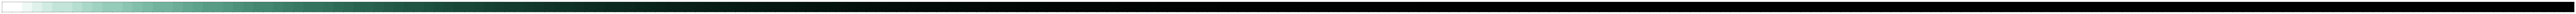

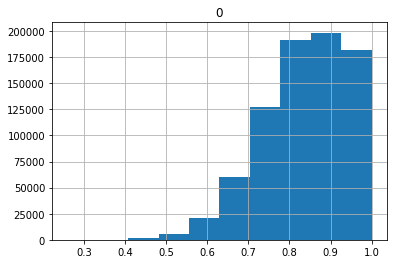

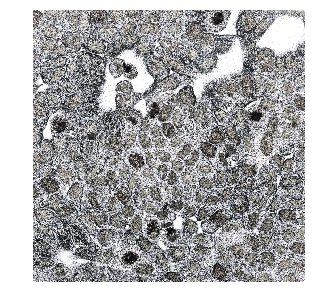

In [179]:
img = (atlas.get_image(atlas.labels.index[0]) * 255).astype(np.int32)

new_img = np.zeros((img.shape[0],img.shape[1],3))

colors = sns.husl_palette(atlas.n_channels)

channel_palettes = list(range(atlas.n_channels))
for channel_ix in range(atlas.n_channels):
    channel_palettes[channel_ix] = sns.cubehelix_palette(
        n_colors = 256, 
        light = 1.0, dark = .2,
        gamma = 10.0,
        rot = 0,
        start = channel_ix * 3/atlas.n_channels,
        reverse = False
    )
    sns.palplot(channel_palettes[channel_ix])


for channel_ix in range(atlas.n_channels):
    palette = channel_palettes[channel_ix]    
    for row_ix in range(img.shape[0]):
        for col_ix in range(img.shape[1]):
            color_ix = img_[row_ix,col_ix,channel_ix]
            r,g,b = palette[color_ix]
            new_img[row_ix,col_ix,0] += r/atlas.n_channels
            new_img[row_ix,col_ix,1] += g/atlas.n_channels
            new_img[row_ix,col_ix,2] += b/atlas.n_channels

pd.DataFrame(new_img.reshape(-1)).hist()
plt.figure(figsize = (5,5))        
plt.imshow(equalize_adapthist(new_img))
plt.axis("off")
plt.savefig("cell.png")

In [182]:
sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.3531778140503475],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

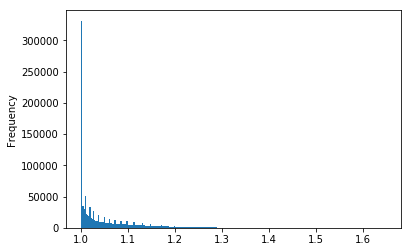

In [192]:
pd.Series(img.reshape(-1)).apply(lambda x: np.exp(x/2)).plot.hist(bins = 256)

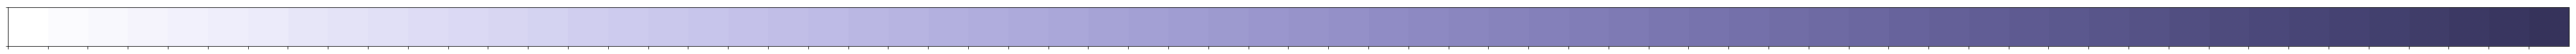

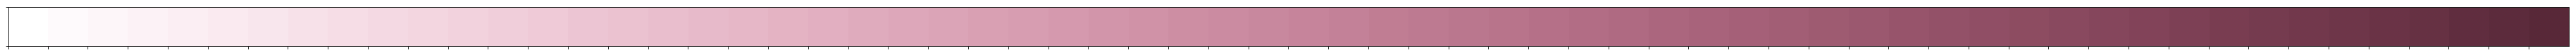

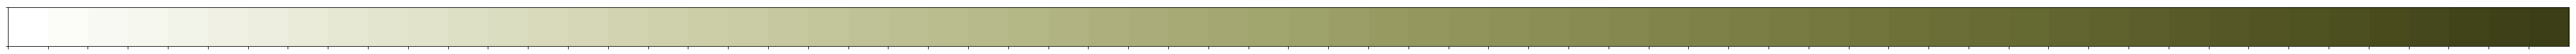

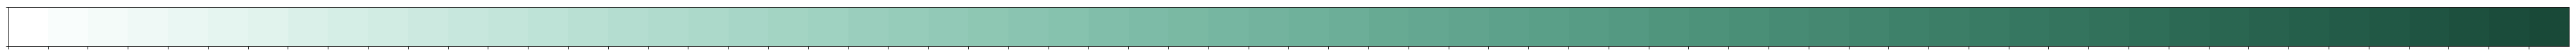

In [181]:
channel_palettes = list(range(atlas.n_channels))
for channel_ix in range(atlas.n_channels):
    channel_palettes[channel_ix] = sns.cubehelix_palette(n_colors = 64, light = 1.0,gamma = 1.0,
                                                        dark = .9/atlas.n_channels,
                                                        rot = 0,
                                                        start = channel_ix * 3/atlas.n_channels)
    sns.palplot(channel_palettes[channel_ix])

<Figure size 360x72 with 0 Axes>

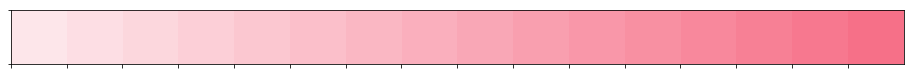

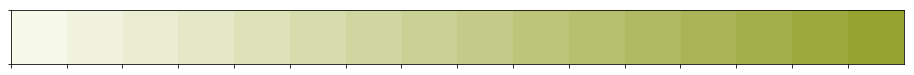

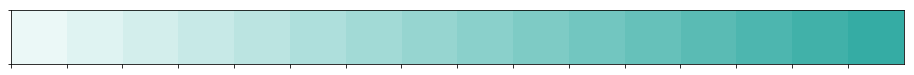

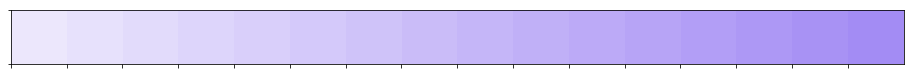

In [41]:
plt.figure(figsize = (5,1))
colors = sns.husl_palette(atlas.n_channels)
palettes = [sns.light_palette(color, n_colors = 16) for color in colors]
for channel_ix, channel in enumerate(atlas.channels):
    sns.palplot(palettes[channel_ix])

## Iterative Stratifications

Don't know exactly what I'm doing here.

In [76]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
reload(pa)
atlas = pa.ProteinAtlas()
mskf = MultilabelStratifiedKFold(n_splits = 10)
y = atlas.labels.values
X = np.zeros(y.shape[0])
np.unique(np.concatenate([test_ix for _, test_ix in mskf.split(X,y)])).size

31072

## Keras Sequence for Batch Generation

In [810]:
from keras.utils import Sequence
from keras.models import Sequential

class ProteinDataGenerator(Sequence):
    def __init__(self,labels,batch_size = 32,shuffle = True):
        """
        Parameters:
        
            labels: DataFrame
            
                should be a subset of the labels in ProteinAtlas.labels
                
            batch_size: int
            
                number of training examples in each batch.
                
            shuffle: bool, default True
            
                If True, 
        
        """
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        
    def __len__(self):
        return int(np.ceil(len(labels) / float(self.batch_size)))
    
    def __getitem__(self, batch_ix):
        """
        Parameters:
        
            batch_ix : int in range [0,len(self))
            
        Returns:
        
            x_batch :

            y_batch :
        """
        start = batch_ix*self.batch_size
        batch = start + np.arange(self.batch_size)

        y_batch = self.labels.iloc[batch].values
        x_batch = np.zeros(0)
        
        return (x_batch, y_batch) 
        
    
batch_gen = ProteinDataGenerator(examples,batch_size = 10)
batch_gen[0]


(array([], dtype=float64),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

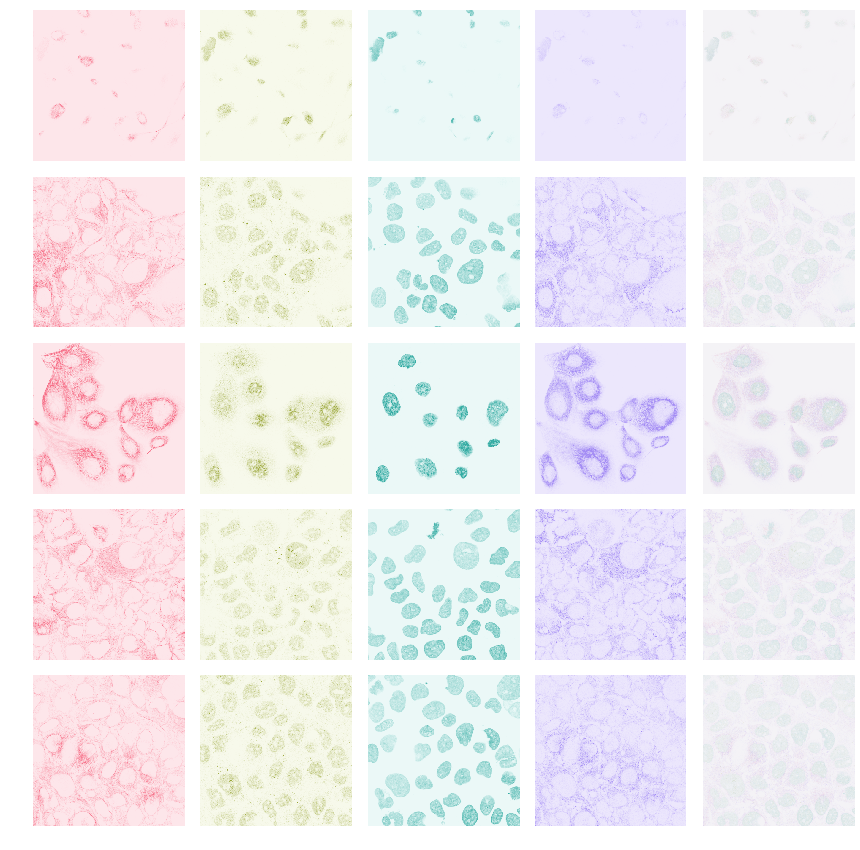

In [180]:
from matplotlib.gridspec import GridSpec

reload(pa)
atlas = pa.ProteinAtlas()

examples = atlas.all(27)[0:5]
n_examples = examples.index.size
(img_width, img_height) = (3, 3)
figsize = (img_width*(atlas.n_channels + 1), img_height*n_examples)
fig = plt.figure(figsize = figsize)
gs = GridSpec(n_examples, atlas.n_channels+1, wspace=0, hspace=.1)

colors = sns.husl_palette(atlas.n_channels)
cmaps = [sns.light_palette(color, as_cmap = True) for color in colors]

for example_ix, id_ in enumerate(examples.index):
    img = atlas.get_image(id_)
    for channel_ix, channel in enumerate(atlas.channels):
        ax = plt.subplot(gs[example_ix,channel_ix])
        ax.set_axis_off()
        ax.imshow(img[:,:,channel_ix], cmap = cmaps[channel_ix])

    ax = plt.subplot(gs[example_ix,atlas.n_channels])
    ax.set_axis_off()

    for channel_ix, channel in enumerate(atlas.channels):
        ax.imshow(img[:,:,channel_ix], cmap = cmaps[channel_ix],alpha=1/atlas.n_channels)     

fig.savefig("examples.jpeg")

In [666]:

plt.subplot()

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_subplot'

## Pandas Settings

## Cell Labels

In [342]:
class_ = 0
n_examples = 10
examples = self.df[self.labels[class_] == 1].sample(n_examples)
example_ids = examples.index
X = np.zeros((n_examples,self.width,self.height,self.depth))
for example_ix, example_id in enumerate(example_ids):
    X[example_ix,:,:,:] = self.get_image(example_id)

In [81]:
from matplotlib.gridspec import GridSpec

n_examples = 2
nrows = self.n_classes
ncols = n_examples
img_height = img_width = 2
figsize = (ncols*img_width, nrows*img_height)
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize, gridspec_kw = {"wspace":0.05, "hspace":0.05})

for class_ix in range(nrows):
    example_ids = self.df[atlas.labels[class_ix] == 1].sample(n_examples).index
    for example_ix, example_id in enumerate(example_ids.values):
        ax = axes[class_ix,example_ix]
        self.imshow(example_id, ax=ax)
        ax.set_axis_off()

NameError: name 'self' is not defined

## Presentation Guidelines
1. Define metric-based goals. (What metric for multilabel classification?)


### Establish an End to End Pipeline

1. Up and running ASAP
2. proof-of-concept/baselines come before optimization

### 